# 🦠 Epidemic Spread Simulator


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
%matplotlib inline

In [2]:
def simulate_sir(S0, I0, R0, beta, gamma, days):
    #Initialize lists to store the values of Susceptible(S) , Infected(I) and Recovered(R)
    S, I, R = [S0], [I0], [R0]

    # Total population (assumed constant throughout the Simulation)
    N = S0 + I0 + R0
    
    for _ in range(days):
        # Calculate changes using the SIR differential equations
        dS = -beta * S[-1] * I[-1] / N
        dI =  beta * S[-1] * I[-1] / N - gamma * I[-1]
        dR =  gamma * I[-1]
        # Update the S,I,R lists with new values every day
        S.append(S[-1] + dS)
        I.append(I[-1] + dI)
        R.append(R[-1] + dR)
    return np.array(S), np.array(I), np.array(R)


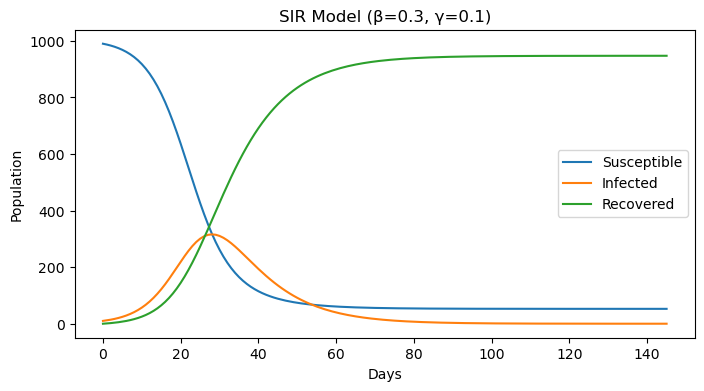

In [10]:
S, I, R = simulate_sir(S0=990, I0=10, R0=0, beta=0.3, gamma=0.1, days=145)
# Create a new figure for plotting with specifieed size ( in inches!!)
plt.figure(figsize=(8,4))
#Plot the Susceptible population 
plt.plot(S, label='Susceptible')
#Plot the Infected population 
plt.plot(I, label='Infected')
#Plot the Recovered population 
plt.plot(R, label='Recovered')
#Label for the X-axis
plt.xlabel('Days')
#Label for the Y-axis
plt.ylabel('Population')
#plot Title
plt.title('SIR Model (β=0.3, γ=0.1)')
plt.legend()
plt.show()

In [13]:
#Create an interactive widget using ipywidgets to control the parameters of the SIR model
@interact(
    S0=IntSlider(min=0, max=5000, step=10, value=990, description='S0'),
    I0=IntSlider(min=0, max=500, step=5, value=10, description='I0'),
    R0=IntSlider(min=0, max=500, step=5, value=0, description='R0'),
    beta=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.3, description='β'),
    gamma=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.1, description='γ'),
    days=IntSlider(min=1, max=365, step=1, value=160, description='Days')
)
def plot_sir(S0, I0, R0, beta, gamma, days):
    #run the SIR model simulation using the current slider values
    S, I, R = simulate_sir(S0, I0, R0, beta, gamma, days)
    plt.figure(figsize=(8,4))
    plt.plot(S, label='S')
    plt.plot(I, label='I')
    plt.plot(R, label='R')
    plt.xlabel('Days')
    plt.ylabel('Count')
    plt.title(f'SIR Model (β={beta}, γ={gamma})')
    plt.legend()
    plt.show()


interactive(children=(IntSlider(value=990, description='S0', max=5000, step=10), IntSlider(value=10, descripti…

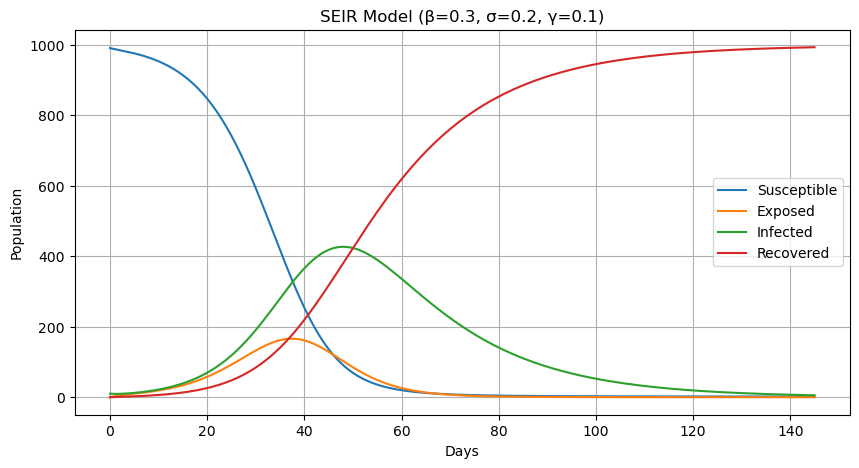

In [14]:
#Run the SEIR model simulation for 145 days with the given initial values and parameters
S, E, I, R = simulate_seir(S0=990, E0=0, I0=10, R0=0, beta=0.3, sigma=0.2, gamma=0.05, days=145)

# Γράφημα
plt.figure(figsize=(10,5))
plt.plot(S, label='Susceptible')
plt.plot(E, label='Exposed')
plt.plot(I, label='Infected')
plt.plot(R, label='Recovered')
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SEIR Model (β=0.3, σ=0.2, γ=0.1)')
plt.legend()
plt.grid(True)
plt.show()